# Modeling wine quality based on physicochemical tests

#### Our aim is to test various machine learning models and their parameters to figure out which one is best for predicting the quality rating of wine. 

#### We will also try to determine the features that affect the quality of wine the most.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
%matplotlib inline

#### We are working with 2 datasets, one containing data about red wine, the other about white wine. Since training the models on a merged dataset produced considerably worse results, we will keep them separate.

# Red Wine

### Data analysis

In [102]:
# reading data

df_red = pd.read_csv('winequality-red.csv',sep=";")
df_red['type'] = 'red'

In [103]:
# dataframe
df_red.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red  
5      9.4        5  red  
6      9.4        5  red  
7     10.0        7  red  
8      9.5        7  red  
9     10.5        5  red

#### Here we see that our dataset has 13 columns, 11 of which describe the physicochemical attributes of wines, 1 representing the type of wine (white/red) and 1 representing the mean quality rating provided by at least 3 different experts. There are no missing values.

In [104]:
# data information (names of columns, numbers of instances in each column, datatype)
df_red.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [105]:
# size of the dataframe

df_red.shape

(1599, 13)

In [106]:
# some statistics on the data

df_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### As we can see, there are significantly more instances with 5 and 6 quality points compared to other ratings. The data is imbalanced. Also, there are no wines rated very bad (1, 2) or very good (9, 10).

In [107]:
# number of instances per quality value

df_red.quality.value_counts().sort_values(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

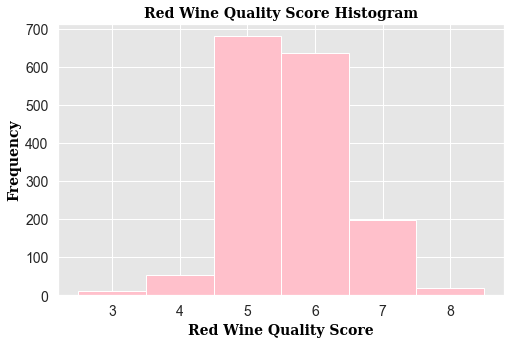

In [108]:
# Red Wine Quality Score Histogram

font_black = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

sns.set()

x_data = set(df_red.quality.values)

f, ax = plt.subplots(figsize=(8,5));

ax.set_facecolor((.9, .9, .9));

plt.hist(df_red.quality, color='pink',bins=np.arange(3,8+2)-.5);
plt.xlabel("Red Wine Quality Score",fontdict=font_black);
plt.ylabel("Frequency",fontdict=font_black);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Red Wine Quality Score Histogram",fontdict=font_black);

#### There seem to be no significant correlations when it comes to wine quality. The strongest positive correlation there is alcohol content.

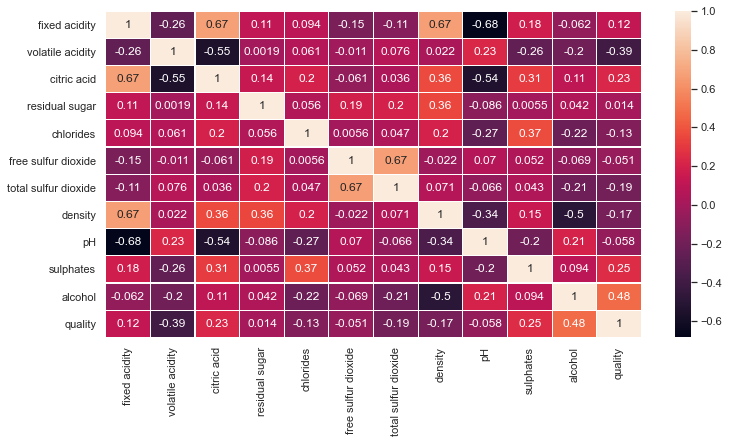

In [109]:
# pairwise correlations of columns

plt.figure(figsize=(12,6))
sns.heatmap(df_red.corr(), annot=True, linewidths = 0.2);

## Classification

In [110]:
# function to train and predict data
# we need to return 2 values (accuracy and result of confusion matrix) 
# we can seperate the functions of (training and predict) (accuracy and confusion)
# we need also to calculate the accuracy of training data to see overfitting and underfitting.

def run_model(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train) # trainin model
    
    y_pred = model.predict(X_test) # predicting data
    
    acc = accuracy_score(y_test,y_pred) # accuracy score
    
    result = confusion_matrix(y_test, y_pred) # confusion matrix
    
    #print(result)
    return acc  # return accuracy

In [111]:
# splitting data into test and training sets

X_train, X_test, y_train, y_test = train_test_split(df_red.drop(columns=['type','quality']),\
                                                    df_red['quality'], test_size = 0.2, random_state=1)

# a new dataframe for storing all the results
results = pd.DataFrame(columns = ['name', 'accuracy score']) 

### K nearest neighbors

In [112]:
# Searching for max accuracy

# We need to add some other parameters (Euclidian) and measure the max accuracy with them as well

max_acc = -1
acc_list = []

for k in range(1,100): 
    knb = KNeighborsClassifier(n_neighbors=k)
    
    acc = run_model(knb,X_train, X_test, y_train, y_test)
    
    acc_list.append(acc)
    
    if acc > max_acc :
        max_acc = acc
        k_max=k
        
print("Highest KNN accuracy: " + str(max_acc) + "; K = " + str(k_max))

results = results.append({'name' : "KNN N=" + str(k_max), 'accuracy score' : max_acc},  
                         ignore_index = True)

Highest KNN accuracy: 0.575; K = 1


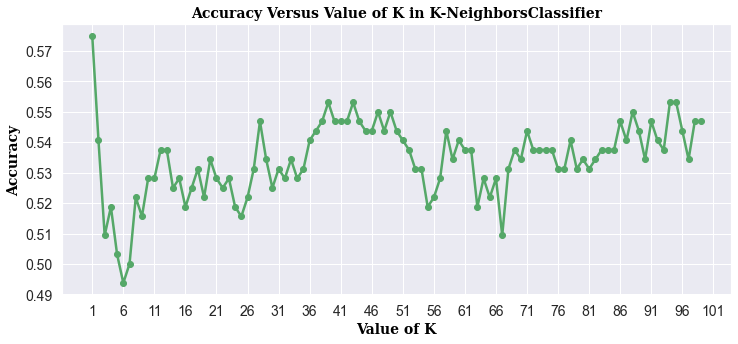

In [113]:
# plotting accuracy 

fig , ax1 = plt.subplots(figsize=(12, 5))
plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);
ax1.plot(range(1,100), acc_list , color='g',linewidth=2.5,marker='o')
plt.xticks(range(1,105,5) ,fontsize=14)
plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier",fontdict=font_black);
plt.show()

#### Trying out KNN for the second time, this time scaling the data first.

In [114]:
# Scaling 

# search for parameters of StandardScaler().
# firstly fit or transform.
# look at the homework for visualisation

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


# scaled data put into a dataframe so it would be easier to see how the values were changed
df_x_train_scaled = pd.DataFrame(X_train_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
df_x_test_scaled = pd.DataFrame(X_test_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [122]:
# seeing what the values look like before and after scaling

X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
701             7.0             0.650         0.02             2.1      0.066   
56             10.2             0.420         0.57             3.4      0.070   
142             5.2             0.340         0.00             1.8      0.050   
863             7.2             0.620         0.06             2.5      0.078   
1387            7.4             0.640         0.07             1.8      0.100   
...             ...               ...          ...             ...        ...   
715             7.2             0.490         0.18             2.7      0.069   
905             9.2             0.580         0.20             3.0      0.081   
1096            6.6             0.725         0.09             5.5      0.117   
235             7.2             0.630         0.00             1.9      0.097   
1061            9.1             0.400         0.50             1.8      0.071   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
701                   8.0                  25.0  0.99720  3.47       0.67   
56                    4.0                  10.0  0.99710  3.04       0.63   
142                  27.0                  63.0  0.99160  3.68       0.79   
863                  17.0                  84.0  0.99746  3.51       0.53   
1387                  8.0                  23.0  0.99610  3.30       0.58   
...                   ...                   ...      ...   ...        ...   
715                  13.0                  34.0  0.99670  3.29       0.48   
905                  15.0                 115.0  0.99800  3.23       0.59   
1096                  9.0                  17.0  0.99655  3.35       0.49   
235                  14.0                  38.0  0.99675  3.37       0.58   
1061                  7.0                  16.0  0.99462  3.21       0.69   

      alcohol  
701       9.5  
56        9.6  
142      14.0  
863       9.7  
1387      9.6  
...       ...  
715       9.2  
905       9.5  
1096     10.8  
235       9.0  
1061     12.5  

[1279 rows x 11 columns]

In [116]:
df_x_train_scaled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.733079          0.664893    -1.257044       -0.320459  -0.453622   
1          1.067741         -0.623462     1.523148        0.608863  -0.369546   
2         -1.746040         -1.071585    -1.358142       -0.534917  -0.789922   
3         -0.620528          0.496847    -1.054849       -0.034513  -0.201396   
4         -0.507977          0.608877    -1.004300       -0.534917   0.261018   
...             ...               ...          ...             ...        ...   
1274      -0.620528         -0.231354    -0.448261        0.108459  -0.390565   
1275       0.504985          0.272785    -0.347163        0.322918  -0.138340   
1276      -0.958182          1.085008    -0.903202        2.110074   0.618337   
1277      -0.620528          0.552862    -1.358142       -0.463431   0.197961   
1278       0.448709         -0.735492     1.169305       -0.534917  -0.348528   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.742407             -0.645507  0.240001  0.988460   
1               -1.125190             -1.112003  0.187899 -1.753513   
2                1.075808              0.536281 -2.677737  2.327564   
3                0.118853              1.189375  0.375468  1.243528   
4               -0.742407             -0.707707 -0.333126 -0.095575   
...                   ...                   ...       ...       ...   
1274            -0.263930             -0.365610 -0.020511 -0.159342   
1275            -0.072539              2.153466  0.656821 -0.541943   
1276            -0.646712             -0.894305 -0.098665  0.223259   
1277            -0.168234             -0.241211  0.005540  0.350792   
1278            -0.838103             -0.925405 -1.104242 -0.669477   

      sulphates   alcohol  
0      0.063095 -0.872234  
1     -0.173904 -0.779785  
2      0.774090  3.287990  
3     -0.766400 -0.687335  
4     -0.470152 -0.779785  
...         ...       ...  
1274  -1.062648 -1.149582  
1275  -0.410902 -0.872234  
1276  -1.003399  0.329609  
1277  -0.470152 -1.334481  
1278   0.181594  1.901249  

[1279 rows x 11 columns]

In [117]:
# calculating the accuracy after scaling

max_acc = -1
acc_list = []

for k in range(1,100): 
    knb = KNeighborsClassifier(n_neighbors=k)
    
    acc = run_model(knb,X_train_scaled, X_test_scaled, y_train, y_test)
    
    acc_list.append(acc)
    
    if acc > max_acc :
        max_acc = acc
        k_max=k

print("Highest KNN accuracy with scaled data: " + str(max_acc) + "; K = " + str(k_max))

results = results.append({'name' : "KNN scaled N=" + str(k_max), 'accuracy score' : max_acc},  
                         ignore_index = True)

Highest KNN accuracy with scaled data: 0.65; K = 31


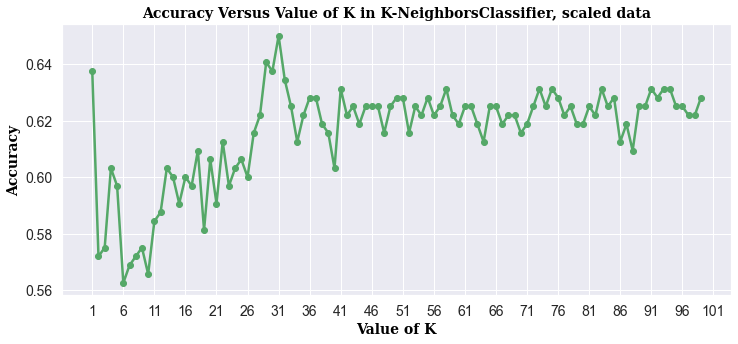

In [118]:
# plotting accuracy 

fig , ax1 = plt.subplots(figsize=(12, 5))
plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);
ax1.plot(range(1,100), acc_list , color='g',linewidth=2.5,marker='o')
plt.xticks(range(1,105,5) ,fontsize=14)
plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier, scaled data",fontdict=font_black);
plt.show()

#### From this we can see that KNN works a bit better on scaled data (accuracy 0.575 vs 0.65).

### Decision Tree

In [119]:
dt = DecisionTreeClassifier(random_state = 42)

results = results.append({'name' : "DTC", 'accuracy score' : run_model(dt,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

In [120]:
rf = RandomForestClassifier(n_estimators = 1001, random_state = 42)

results = results.append({'name' : "RFC n = 1001", 'accuracy score' : run_model(rf,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

In [121]:
svc = SVC(kernel='rbf',gamma='auto',random_state = 42)

results = results.append({'name' : "SVC kernel = rbf; gamma = auto", 'accuracy score' : run_model(svc,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)
results

name  accuracy score
0                         KNN N=1        0.575000
1                 KNN scaled N=31        0.650000
2                             DTC        0.643750
3                    RFC n = 1001        0.721875
4  SVC kernel = rbf; gamma = auto        0.609375

## Cross Validation with Random Forest

In [22]:
cv = KFold(n_splits=5 , random_state=42, shuffle=True)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.65234375 0.72265625 0.69140625 0.67578125 0.63921569]
mean score: 0.676280637254902


In [23]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.73046875 0.69140625 0.640625   0.70703125 0.62352941 0.67578125
 0.68359375 0.6796875  0.66796875 0.6745098  0.70703125 0.62109375
 0.6796875  0.71875    0.65098039]
mean score: 0.6768096405228757


In [24]:
#param_grid ={'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': list(range(500,1250,100))}
#grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=3)
#grid.fit(X_train, y_train)

In [25]:
#best_params = grid.best_params_
#print(best_params)
#best_score = grid.best_score_
#print(best_score)
#{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 
#'min_samples_split': 5, 'n_estimators': 1100}
#best_score = .68

### Regression

In [26]:
def run_reg_model(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test,y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    
    return (r2,mse)

In [27]:
lr = LinearRegression()
r2 , mse = run_reg_model(lr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.3266402726986821 0.3830719815814284


In [28]:
svr = SVR(kernel = 'linear',gamma='auto')
r2 , mse = run_reg_model(svr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.32534380766349535 0.3838095359820613


In [29]:
rf = RandomForestRegressor(n_estimators = 1001, random_state = 42)
r2 , mse = run_reg_model(rf,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.43934498766534813 0.3189546654644057


In [30]:
lasso  = Lasso(alpha=0.001)
r2 , mse = run_reg_model(lasso ,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.3322760215759383 0.37986582385833706


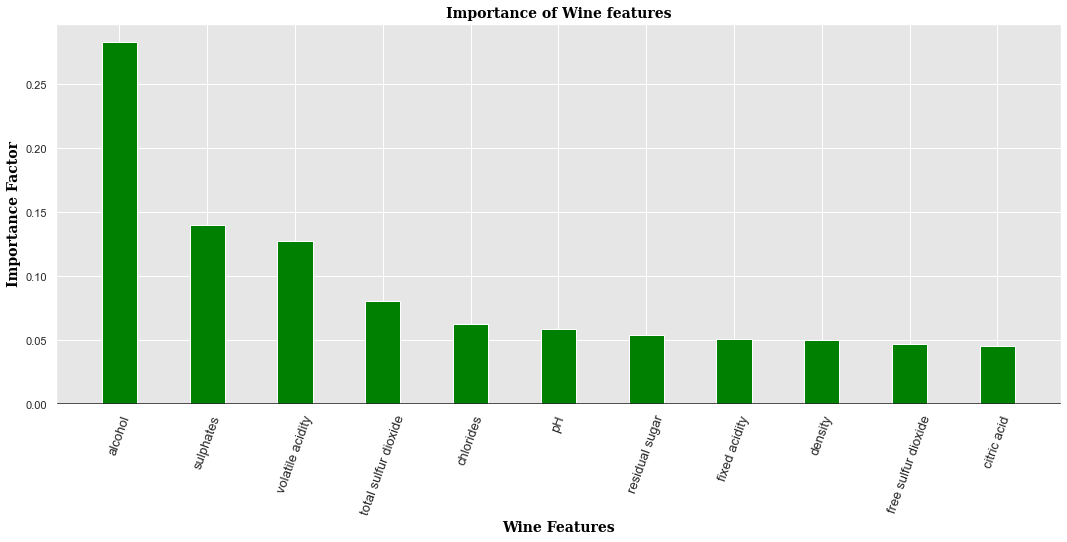

In [31]:
# most releated features(column)

important_feature = pd.DataFrame(columns=['feature','Importance_factor'])
important_feature['feature'] = X_train.columns
important_feature['Importance_factor'] = rf.feature_importances_
important_feature.sort_values(by='Importance_factor',ascending=False,inplace=True)


f, ax = plt.subplots(figsize=(18,7))
ax.set_facecolor((.9, .9, .9)) 
x_data = important_feature.feature
y_data = important_feature.Importance_factor
x_pos = list(range(len(x_data)))


plt.bar(x_data,y_data, color="green",width=.4)
plt.xticks(x_pos,x_data,fontsize=13,rotation=70);
plt.title("Importance of Wine features",fontdict=font_black)
plt.xlabel("Wine Features",fontdict=font_black,)
plt.ylabel("Importance Factor",fontdict=font_black)
plt.axhline(0, color='black');

## White wine

In [32]:
df_white = pd.read_csv('winequality-white.csv',sep=";")
df_white['type'] = 'white'
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [33]:
df_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [34]:
df_white.quality.value_counts().sort_values(ascending=False)

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

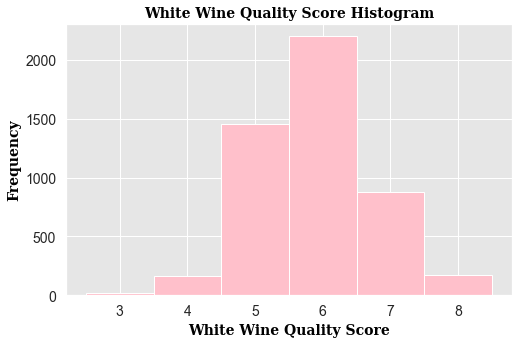

In [35]:
x_data = set(df_white.quality.values)
f, ax = plt.subplots(figsize=(8,5));
ax.set_facecolor((.9, .9, .9));
plt.hist(df_white.quality, color='pink',bins=np.arange(3,8+2)-.5);
plt.xlabel("White Wine Quality Score",fontdict=font_black);
plt.ylabel("Frequency",fontdict=font_black);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("White Wine Quality Score Histogram",fontdict=font_black);

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_white.drop(columns=['type','quality']),\
                                                    df_white['quality'], test_size = 0.2, random_state=1)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
max_acc = -1
acc_list = []
for k in range(1,100): 
    knb = KNeighborsClassifier(n_neighbors=k)
    acc = run_model(knb,X_train_scaled, X_test_scaled, y_train, y_test)
    acc_list.append(acc)
    if acc > max_acc :
        max_acc = acc
        k_max=k
print(max_acc,k_max)

0.6561224489795918 1


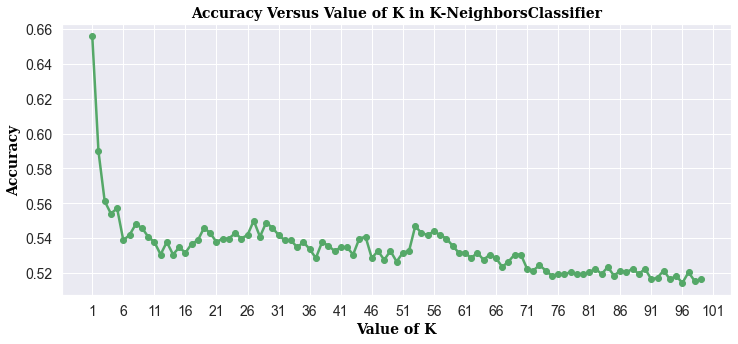

In [38]:
fig , ax1 = plt.subplots(figsize=(12, 5))
plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);
ax1.plot(range(1,100), acc_list , color='g',linewidth=2.5,marker='o')
plt.xticks(range(1,105,5) ,fontsize=14)
plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier",fontdict=font_black);
plt.show()

In [39]:
dt = DecisionTreeClassifier(random_state = 42)
run_model(dt,X_train, X_test, y_train, y_test)

0.6071428571428571

In [40]:
rf = RandomForestClassifier(n_estimators = 1001, random_state = 42)
run_model(rf,X_train, X_test, y_train, y_test)

0.6887755102040817

In [41]:
svc = SVC(kernel='rbf',gamma='auto',random_state = 42)
run_model(svc,X_train, X_test, y_train, y_test)

0.5653061224489796

In [42]:
cv = KFold(n_splits=5 , random_state=42, shuffle=True)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.65688776 0.66581633 0.65816327 0.67816092 0.66411239]
mean score: 0.6646281309458649


In [43]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.67219388 0.67857143 0.63903061 0.67816092 0.68326948 0.68112245
 0.66326531 0.66326531 0.68199234 0.62707535 0.65433673 0.65816327
 0.6619898  0.65261814 0.65006386]
mean score: 0.6630079234759038


In [44]:
#param_grid ={'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': list(range(500,1250,100))}
#grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=3)
#grid.fit(X_train, y_train)

In [45]:
# best_params = grid.best_params_
# print(best_params)
# best_score = grid.best_score_
# print(best_score)

- {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}
- 0.6454823889739663

### Regression

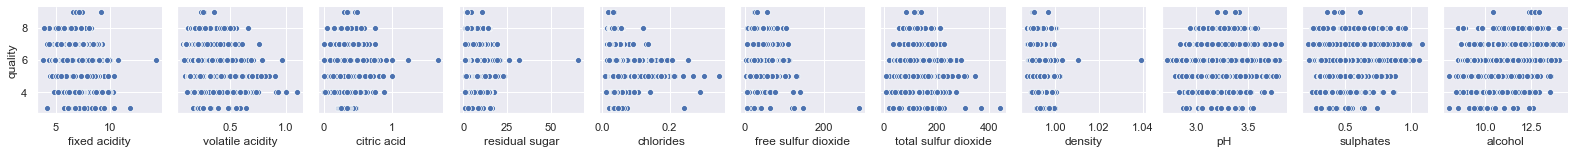

In [46]:
columns = df_white.columns
columns = list(columns)
columns.remove('type')
columns.remove('quality')
sns.pairplot(df_white,x_vars=columns,y_vars=["quality"],height=2);

In [47]:
lr = LinearRegression()
r2 , mse = run_reg_model(lr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.2901221946696403 0.5425487263544204


In [48]:
svr = SVR(kernel = 'linear',gamma='auto')
r2 , mse = run_reg_model(svr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.27300630054855324 0.5556301418967634


In [49]:
lasso  = Lasso(alpha=0.001)
r2 , mse = run_reg_model(lasso,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.27875625896153067 0.5512355368110332


In [50]:
rf = RandomForestRegressor(n_estimators = 1001, random_state = 42)
r2 , mse = run_reg_model(rf,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.5319015866777645 0.3577604427825635


In [51]:
important_feature = pd.DataFrame(columns=['feature','Importance_factor'])
important_feature['feature'] = X_train.columns
important_feature['Importance_factor'] = rf.feature_importances_
important_feature.sort_values(by='Importance_factor',ascending=False,inplace=True)
important_feature

feature  Importance_factor
10               alcohol           0.241652
1       volatile acidity           0.127466
5    free sulfur dioxide           0.117326
8                     pH           0.070758
3         residual sugar           0.068688
6   total sulfur dioxide           0.066720
0          fixed acidity           0.064952
4              chlorides           0.063331
7                density           0.061168
2            citric acid           0.059445
9              sulphates           0.058494

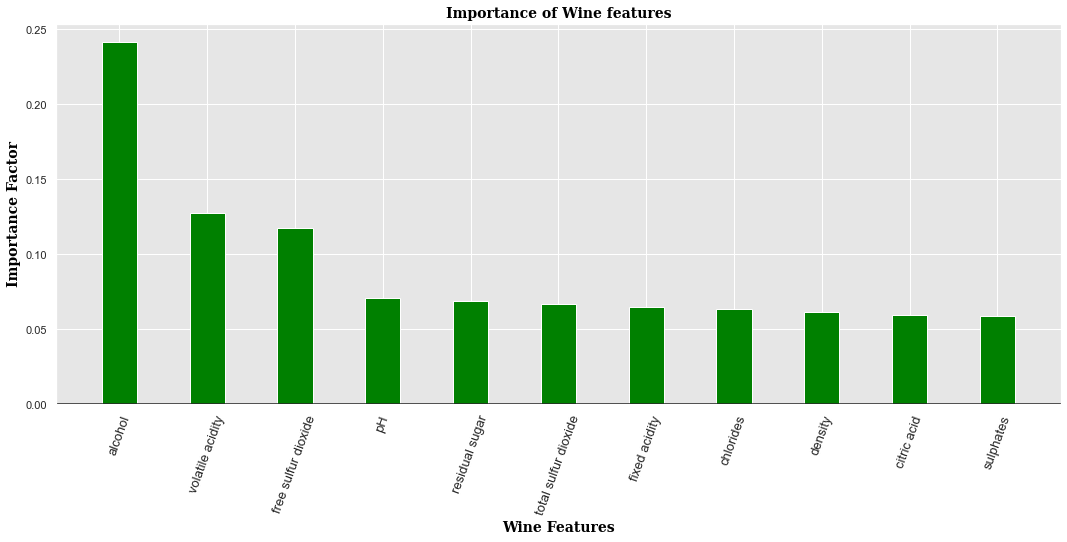

In [52]:
f, ax = plt.subplots(figsize=(18,7))
ax.set_facecolor((.9, .9, .9)) 
x_data = important_feature.feature
y_data = important_feature.Importance_factor
x_pos = list(range(len(x_data)))
plt.bar(x_data,y_data, color="green",width=.4)
plt.xticks(x_pos,x_data,fontsize=13,rotation=70);
plt.title("Importance of Wine features",fontdict=font_black)
plt.xlabel("Wine Features",fontdict=font_black,)
plt.ylabel("Importance Factor",fontdict=font_black)
plt.axhline(0, color='black');